In [2]:
pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [4]:
data = pd.read_csv("GettingData/gameLogs.csv")

In [5]:
data.dropna()

,Unnamed: 0,CITY,NICKNAME,TEAM_ID,W,L,W_HOME,L_HOME,W_ROAD,L_ROAD,...,GAME_DATE,GAME_ID,HOME_FLAG,AWAY_FLAG,HOME_WIN_PCTG,AWAY_WIN_PCTG,TOTAL_WIN_PCTG,ROLLING_SCORING_MARGIN,ROLLING_OE,NUM_REST_DAYS
0,0,Atlanta,Hawks,1610612737,1,0,1,0,0,0,...,2021-05-16,22001066,1,0,0.694444,0.444444,0.569444,18.666667,0.594231,3.0
1,1,OPPONENTS,Rockets,1610612745,0,1,0,0,0,1,...,2021-05-16,22001066,0,1,0.250000,0.222222,0.236111,-8.000000,0.559973,2.0
2,2,Atlanta,Hawks,1610612737,1,0,1,0,0,0,...,2021-05-13,22001049,1,0,0.685714,0.444444,0.563380,9.333333,0.571405,1.0
3,3,OPPONENTS,Magic,1610612753,0,1,0,0,0,1,...,2021-05-13,22001049,0,1,0.305556,0.294118,0.300000,-22.333333,0.502823,2.0
4,4,Atlanta,Hawks,1610612737,1,0,1,0,0,0,...,2021-05-12,22001042,1,0,0.676471,0.444444,0.557143,-0.666667,0.589472,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,7075,OPPONENTS,Pistons,1610612765,0,1,0,0,0,1,...,2023-02-27,22200919,0,1,0.266667,0.218750,0.241935,-5.666667,0.529425,2.0
7076,7076,Detroit,Pistons,1610612765,1,0,1,0,0,0,...,2023-02-03,22200785,1,0,0.269231,0.259259,0.264151,-1.000000,0.545693,4.0
7077,7077,OPPONENTS,Hornets,1610612766,0,1,0,0,0,1,...,2023-02-03,22200785,0,1,0.304348,0.258065,0.277778,-10.333333,0.524888,1.0
7078,7078,Charlotte,Hornets,1610612766,0,1,0,1,0,0,...,2022-12-14,22200414,1,0,0.285714,0.214286,0.250000,-14.666667,0.530214,3.0


In [6]:
data["TS_PCT"] = data["PTS"]/(2*(data["FGA"]+(0.475*data["FTA"])))
data["STL+BLK"] = data["STL"] + data["BLK"]
data["TOV_PCT"] = data["TOTAL_TURNOVERS"]/(data["FGA"]+(0.475*data["FTA"])+data["AST"]+data["TOTAL_TURNOVERS"])

In [7]:
data = data.drop(["Unnamed: 0","NICKNAME","GP","GS","ACTUAL_MINUTES","ACTUAL_SECONDS","FG","FGA","FG3","FG3A","FT","FTA","OFF_REB","DEF_REB","PF","AVG_REB","AVG_PTS","DQ","SCORING_MARGIN","HOME_FLAG","AWAY_FLAG"],axis=1).sort_values("GAME_DATE")

In [8]:
data["LAST_3_GAME_AVG_OE"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['OFFENSIVE_EFFICIENCY'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['OFFENSIVE_EFFICIENCY'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['OFFENSIVE_EFFICIENCY'].shift(3)))/3
data["LAST_3_GAME_AVG_HOME_WIN_PCTG"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['HOME_WIN_PCTG'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['HOME_WIN_PCTG'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['HOME_WIN_PCTG'].shift(3)))/3
data["LAST_3_GAME_AVG_AWAY_WIN_PCTG"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AWAY_WIN_PCTG'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AWAY_WIN_PCTG'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AWAY_WIN_PCTG'].shift(3)))/3
data["LAST_3_GAME_AVG_TOTAL_WIN_PCTG"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_WIN_PCTG'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_WIN_PCTG'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_WIN_PCTG'].shift(3)))/3
data["LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_SCORING_MARGIN'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_SCORING_MARGIN'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_SCORING_MARGIN'].shift(3)))/3
data["LAST_3_GAME_AVG_ROLLING_OE"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_OE'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_OE'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_OE'].shift(3)))/3
data["LAST_3_GAME_AVG_TS_PCT"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TS_PCT'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TS_PCT'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TS_PCT'].shift(3)))/3
data["LAST_3_GAME_AVG_FG3_PCT"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG3_PCT'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG3_PCT'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG3_PCT'].shift(3)))/3
data["LAST_3_GAME_AVG_TOT_REB"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOT_REB'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOT_REB'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOT_REB'].shift(3)))/3
data["LAST_3_GAME_AVG_STL+BLK"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL+BLK'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL+BLK'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL+BLK'].shift(3)))/3
data["LAST_3_GAME_AVG_TOV_PCT"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOV_PCT'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOV_PCT'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOV_PCT'].shift(3)))/3
data["LAST_3_GAME_AVG_PTS"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['PTS'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['PTS'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['PTS'].shift(3)))/3
data["LAST_3_GAME_AVG_FG_PCT"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG_PCT'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG_PCT'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FG_PCT'].shift(3)))/3
data["LAST_3_GAME_AVG_FT_PCT"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FT_PCT'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FT_PCT'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['FT_PCT'].shift(3)))/3
data["LAST_3_GAME_AVG_AST"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AST'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AST'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AST'].shift(3)))/3
data["LAST_3_GAME_AVG_STL"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['STL'].shift(3)))/3
data["LAST_3_GAME_AVG_TOTAL_TURNOVERS"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_TURNOVERS'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_TURNOVERS'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_TURNOVERS'].shift(3)))/3
data["LAST_3_GAME_AVG_BLK"] = ((data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['BLK'].shift(1)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['BLK'].shift(2)) + (data.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['BLK'].shift(3)))/3
data=data.dropna()
data

,CITY,TEAM_ID,W,L,W_HOME,L_HOME,W_ROAD,L_ROAD,TEAM_TURNOVERS,TEAM_REBOUNDS,...,LAST_3_GAME_AVG_TOT_REB,LAST_3_GAME_AVG_STL+BLK,LAST_3_GAME_AVG_TOV_PCT,LAST_3_GAME_AVG_PTS,LAST_3_GAME_AVG_FG_PCT,LAST_3_GAME_AVG_FT_PCT,LAST_3_GAME_AVG_AST,LAST_3_GAME_AVG_STL,LAST_3_GAME_AVG_TOTAL_TURNOVERS,LAST_3_GAME_AVG_BLK
1397,OPPONENTS,1610612749,0,1,0,0,0,1,0,2,...,56.666667,12.666667,0.105038,130.666667,0.514000,0.761000,27.000000,9.000000,15.333333,3.666667
136,Brooklyn,1610612751,1,0,1,0,0,0,1,5,...,54.333333,14.333333,0.125387,112.666667,0.458667,0.800333,24.000000,7.333333,17.333333,7.000000
405,OPPONENTS,1610612739,0,1,0,0,0,1,0,12,...,53.000000,19.666667,0.108378,110.666667,0.458667,0.709333,27.333333,13.000000,16.000000,6.666667
404,Indiana,1610612754,1,0,1,0,0,0,0,7,...,46.666667,17.000000,0.112271,114.666667,0.527333,0.726000,28.000000,11.666667,15.666667,5.333333
660,Washington,1610612764,0,1,0,1,0,0,0,8,...,54.333333,10.000000,0.110490,113.333333,0.469667,0.755667,26.666667,5.666667,16.000000,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,Los Angeles,1610612747,1,0,1,0,0,0,1,8,...,57.000000,10.666667,0.097189,124.666667,0.498333,0.734333,26.333333,5.333333,14.000000,5.333333
5521,OPPONENTS,1610612758,0,1,0,0,0,1,0,6,...,55.333333,11.000000,0.074974,112.333333,0.442333,0.715000,30.000000,8.333333,11.000000,2.666667
5781,OPPONENTS,1610612745,1,0,0,0,1,0,0,6,...,56.666667,14.333333,0.097364,115.000000,0.454667,0.766667,22.333333,9.000000,14.000000,5.333333
5897,OPPONENTS,1610612746,1,0,0,0,1,0,0,11,...,49.000000,11.333333,0.092280,125.000000,0.515000,0.848333,26.000000,7.000000,12.666667,4.333333


In [9]:
def getHomeTeamFrame(gameDF):
        homeTeamFrame = gameDF[gameDF['CITY'] != 'OPPONENTS']
        homeTeamFrame = homeTeamFrame[['LAST_3_GAME_AVG_OE','NUM_REST_DAYS','LAST_3_GAME_AVG_TOTAL_WIN_PCTG','LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN','LAST_3_GAME_AVG_ROLLING_OE','W','TEAM_ID','GAME_ID','SEASON',"LAST_3_GAME_AVG_TS_PCT","LAST_3_GAME_AVG_FG3_PCT","LAST_3_GAME_AVG_TOT_REB","LAST_3_GAME_AVG_STL+BLK","LAST_3_GAME_AVG_TOV_PCT","LAST_3_GAME_AVG_PTS","LAST_3_GAME_AVG_FG_PCT","LAST_3_GAME_AVG_FT_PCT","LAST_3_GAME_AVG_AST","LAST_3_GAME_AVG_STL","LAST_3_GAME_AVG_TOTAL_TURNOVERS","LAST_3_GAME_AVG_BLK"]]
        colRenameDict = {}
        for col in homeTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON') :
                colRenameDict[col] = 'HOME_' + col 
        homeTeamFrame.rename(columns=colRenameDict,inplace=True)
        return homeTeamFrame

In [10]:
def getAwayTeamFrame(data):
        awayTeamFrame = data[data['CITY'] == 'OPPONENTS']
        awayTeamFrame = awayTeamFrame[['LAST_3_GAME_AVG_OE','NUM_REST_DAYS','LAST_3_GAME_AVG_TOTAL_WIN_PCTG','LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN','LAST_3_GAME_AVG_ROLLING_OE','TEAM_ID','GAME_ID','SEASON',"LAST_3_GAME_AVG_TS_PCT","LAST_3_GAME_AVG_FG3_PCT","LAST_3_GAME_AVG_TOT_REB","LAST_3_GAME_AVG_STL+BLK","LAST_3_GAME_AVG_TOV_PCT","LAST_3_GAME_AVG_PTS","LAST_3_GAME_AVG_FG_PCT","LAST_3_GAME_AVG_FT_PCT","LAST_3_GAME_AVG_AST","LAST_3_GAME_AVG_STL","LAST_3_GAME_AVG_TOTAL_TURNOVERS","LAST_3_GAME_AVG_BLK"]]
        colRenameDict = {}
        for col in awayTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'AWAY_' + col 
        awayTeamFrame.rename(columns=colRenameDict,inplace=True)
        return awayTeamFrame

In [11]:
awayTeamFrame = getAwayTeamFrame(data)
homeTeamFrame = getHomeTeamFrame(data)
data = pd.merge(homeTeamFrame, awayTeamFrame, how="inner", on=[ "GAME_ID","SEASON"]).drop(['GAME_ID','AWAY_TEAM_ID','HOME_TEAM_ID',"SEASON"],axis=1)
data=data.dropna()

In [12]:
data.columns

Index(['HOME_LAST_3_GAME_AVG_OE', 'HOME_NUM_REST_DAYS',
       'HOME_LAST_3_GAME_AVG_TOTAL_WIN_PCTG',
       'HOME_LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN',
       'HOME_LAST_3_GAME_AVG_ROLLING_OE', 'HOME_W',
       'HOME_LAST_3_GAME_AVG_TS_PCT', 'HOME_LAST_3_GAME_AVG_FG3_PCT',
       'HOME_LAST_3_GAME_AVG_TOT_REB', 'HOME_LAST_3_GAME_AVG_STL+BLK',
       'HOME_LAST_3_GAME_AVG_TOV_PCT', 'HOME_LAST_3_GAME_AVG_PTS',
       'HOME_LAST_3_GAME_AVG_FG_PCT', 'HOME_LAST_3_GAME_AVG_FT_PCT',
       'HOME_LAST_3_GAME_AVG_AST', 'HOME_LAST_3_GAME_AVG_STL',
       'HOME_LAST_3_GAME_AVG_TOTAL_TURNOVERS', 'HOME_LAST_3_GAME_AVG_BLK',
       'AWAY_LAST_3_GAME_AVG_OE', 'AWAY_NUM_REST_DAYS',
       'AWAY_LAST_3_GAME_AVG_TOTAL_WIN_PCTG',
       'AWAY_LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN',
       'AWAY_LAST_3_GAME_AVG_ROLLING_OE', 'AWAY_LAST_3_GAME_AVG_TS_PCT',
       'AWAY_LAST_3_GAME_AVG_FG3_PCT', 'AWAY_LAST_3_GAME_AVG_TOT_REB',
       'AWAY_LAST_3_GAME_AVG_STL+BLK', 'AWAY_LAST_3_GAME_AVG_TOV_PCT',
      

In [13]:
corr = data.corr()

<Axes: >

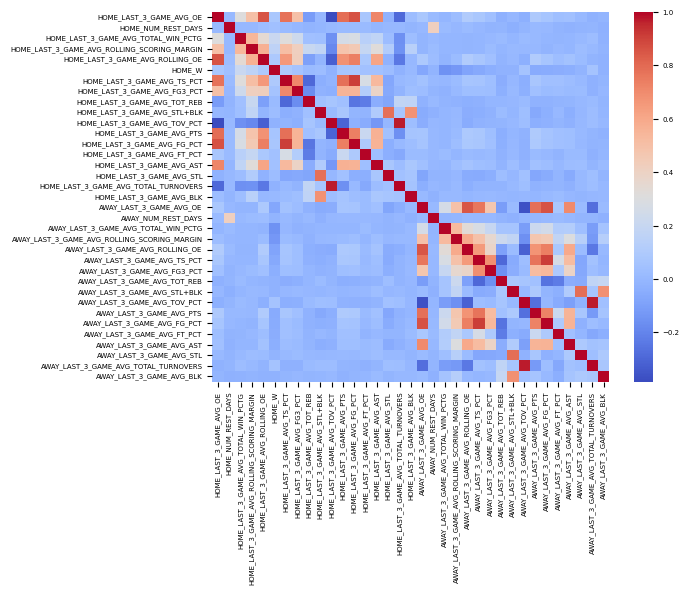

In [14]:
plt.rcParams.update({'font.size': 5})
sns.heatmap(corr, annot=False, cmap="coolwarm")

In [15]:
corr_matrix = data.corr()["HOME_W"]

In [24]:
corr_matrix.abs().sort_values()

HOME_LAST_3_GAME_AVG_BLK                       0.008599
HOME_LAST_3_GAME_AVG_TOT_REB                   0.013194
AWAY_LAST_3_GAME_AVG_STL                       0.016839
AWAY_NUM_REST_DAYS                             0.019628
HOME_LAST_3_GAME_AVG_TOV_PCT                   0.022041
AWAY_LAST_3_GAME_AVG_TOT_REB                   0.022147
HOME_LAST_3_GAME_AVG_TOTAL_TURNOVERS           0.023741
AWAY_LAST_3_GAME_AVG_BLK                       0.023964
HOME_LAST_3_GAME_AVG_STL+BLK                   0.024220
HOME_LAST_3_GAME_AVG_STL                       0.025517
AWAY_LAST_3_GAME_AVG_STL+BLK                   0.027187
HOME_NUM_REST_DAYS                             0.037488
AWAY_LAST_3_GAME_AVG_FG3_PCT                   0.038448
AWAY_LAST_3_GAME_AVG_AST                       0.039905
HOME_LAST_3_GAME_AVG_AST                       0.046173
HOME_LAST_3_GAME_AVG_FT_PCT                    0.046204
AWAY_LAST_3_GAME_AVG_FT_PCT                    0.047205
AWAY_LAST_3_GAME_AVG_FG_PCT                    0

Looking at features, dropping features with under 0.05 correlation